In [349]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Load the Data ##

In [350]:
df = pd.read_csv('Student_performance_data.csv')

## Preprocess the Data ##



In [351]:
# Preprocess the data
df = pd.get_dummies(df, drop_first=True)

In [352]:
df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [353]:
# Check for any missing values
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


## Feature Distribution ##

array([[<Axes: title={'center': 'StudentID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>],
       [<Axes: title={'center': 'ParentalEducation'}>,
        <Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>],
       [<Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>,
        <Axes: title={'center': 'GradeClass'}>, <Axes: >]], dtype=object)

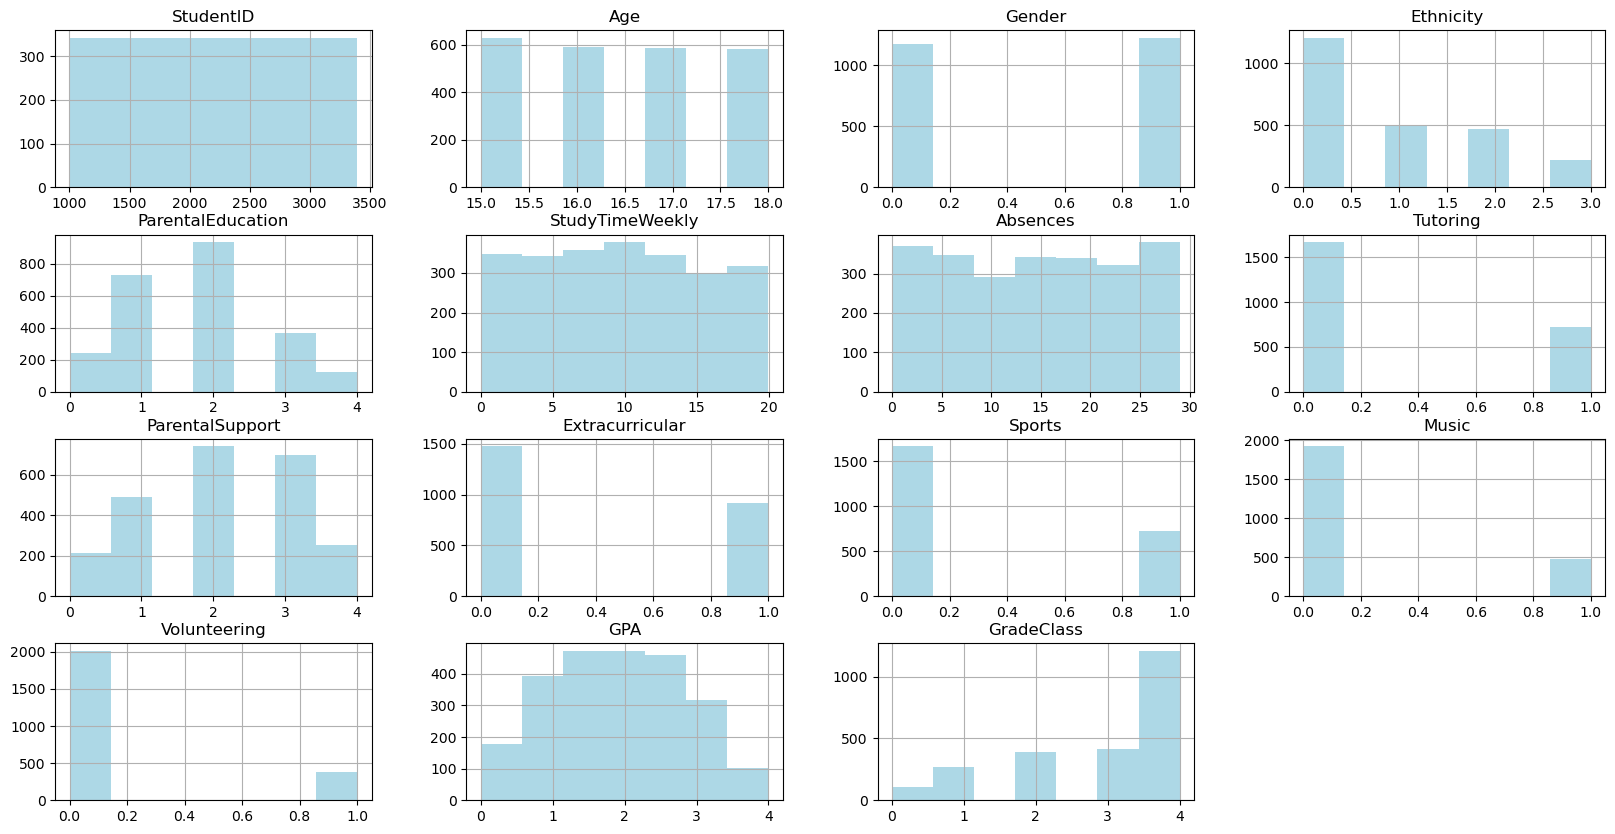

In [354]:
df.hist(figsize=(20,10),bins=7, color='lightblue')

##### Observations: ####

- StudentID has no distribution and logically would have no effect on Grade Class.
- There are only 4 ages in this dataset, which strangely makes age a categorical feature
- There are only 4 ethnicity variables in this dataset
- There are a higher number of low-scoring students in this dataset (a majority of 4s - Fs  compared to 0, 1 and 2s (A, B AND Cs) in GradeClass)

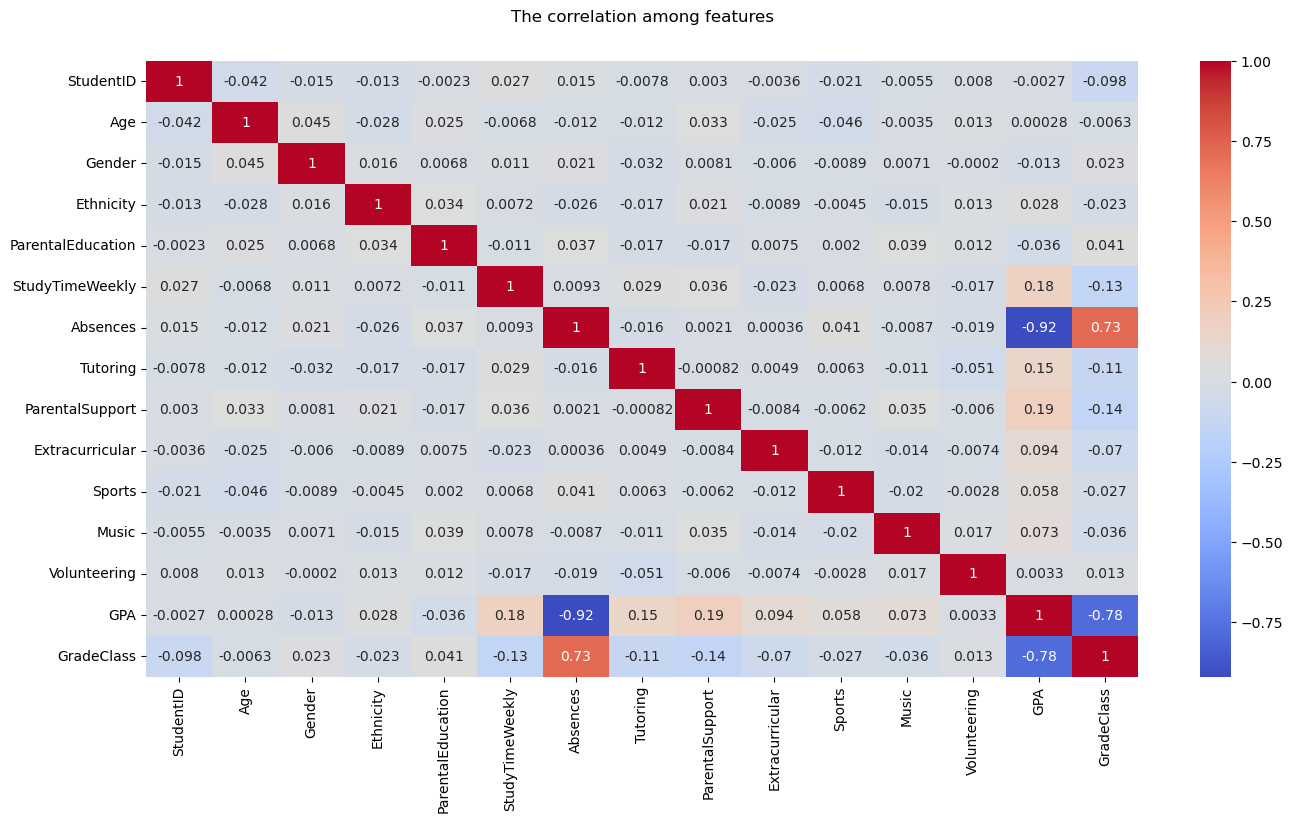

In [356]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

##### Observations #####
Looking at the above figure we can see that the features with the highest correlation to GradeClass is the number of absences and the GPA, however we will see later why using the GPA cannot be used as a predictor for the GradeClass.

## Split the data into X and Y features ##

I'm going to split this dataset 2 ways before proceeding:

- Split the data into our predictors (X) and our target feature (y)
- Split the X and y dataframes into training and testing sets

Note: I'm also dropping some features that I don't want to add noise to the model here:

- GradeClass <- our target feature
- StudentID <- studentID is not logically a useful predictor of a student's grade
- GPA <-- It is easy to simply predict a student's current grades from their GPA , however this would not help us with future predictions and would just lead to unneccessary noise.

    For further details on why you should not use GPA as a predictor please see: [🚫Why You Shouldn't Use GPA to Predict Class Grade❌](https://www.kaggle.com/code/joelknapp/student-performance-analysis/notebook)

In [357]:
X = df.drop(columns=['StudentID', 'GPA', 'GradeClass'])
y = df['GradeClass']

In [358]:
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


In [359]:
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [360]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [361]:
clf = RandomForestClassifier(random_state = 42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h', palette='viridis')

#### Observation #### 
The above chart shows us that the most important feature, by a long shot, for predicting a student's grade class is the number of absences which makes sense because it directly impacts the time students spend engaging with their lessons. Frequent absences mean missing critical instruction, assignments, and opportunities to ask questions, which can hinder academic performance. Students who miss more school days are less likely to keep up with the curriculum, leading to lower grades. Attendance often correlates with other factors such as motivation, parental support, and overall engagement, which further explains its strong influence on academic outcomes in models predicting grade classifications.

In [362]:
# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter= 1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}


In [371]:
results={}

# Loop through the classifiers
for name, model in classifiers.items():
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Determine the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Logistic Regression Accuracy: 0.6894
K-Nearest Neighbors Accuracy: 0.6685
Support Vector Machine Accuracy: 0.6936
Decision Tree Accuracy: 0.5989
Random Forest Accuracy: 0.7047
Gaussian Naive Bayes Accuracy: 0.6462

Best Model: Random Forest with Accuracy: 0.7047


## Evaluating Model ##

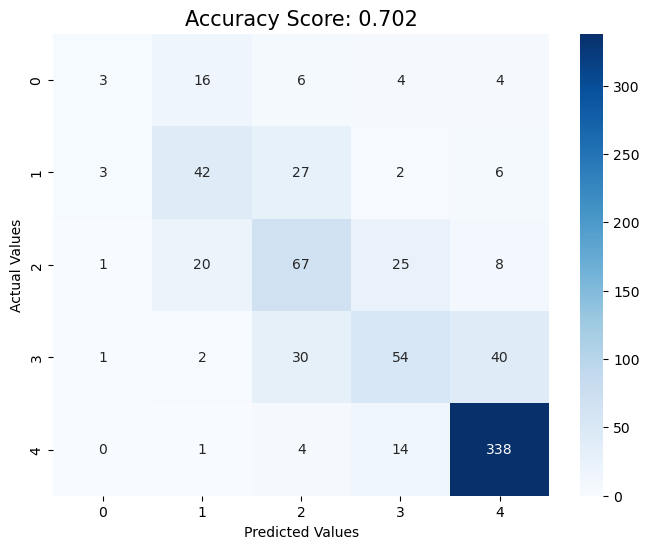

In [374]:
from sklearn.metrics import confusion_matrix

# Create an instance of the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Initialize and train the model
classifier.fit(X_train, y_train)

# Calculate the accuracy score
model_score = classifier.score(X_test, y_test)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

I found that the model with the highest accuracy was the Random Forest and then fit this to the training data and created a confusion matrix detailing our predictions. As you can see we got a accuracy score of 70.2% which though not perfect is on the higher side implying that our predicitions though maybe not incredibly accurate are on the right track.

## Hyperparameter Tuning ##

A grid search is generally more powerful, at the cost of increased resources. A randomized search might not be 100% optimal, but it is generally faster.

In this case I've selected a RandomizedSearch due to the power of my laptop.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


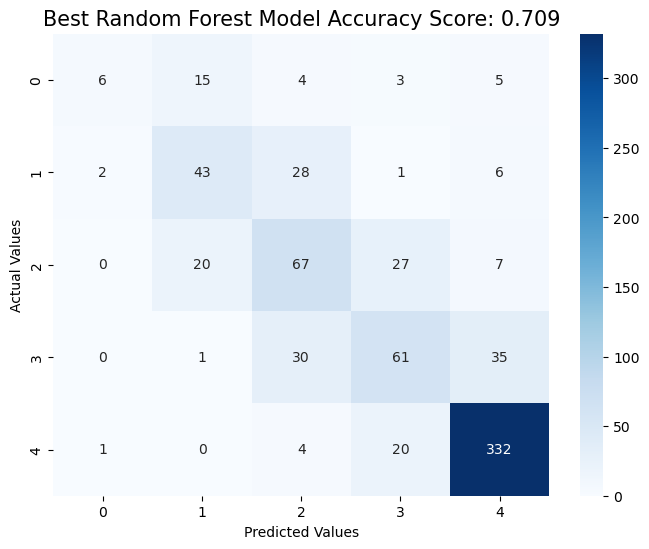

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30}


In [373]:
from sklearn.model_selection import RandomizedSearchCV

# Define the corrected parameter grid for RandomForest
param_grid = {
    'n_estimators': np.arange(50, 201, 10),  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Corrected the value here
    'max_depth': [None] + list(np.arange(10, 51, 5)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier,
                                       param_distributions=param_grid,
                                       n_iter=100,  # Number of parameter settings to sample
                                       cv=3,  # Number of folds in cross-validation
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)  # Use all available cores

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_rf_model.predict(X_test)
model_score_best = accuracy_score(y_test, y_pred_best)

# Calculate and plot the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Best Random Forest Model Accuracy Score: {0:.3f}'.format(model_score_best), size=15)
plt.show()

# Print the best hyperparameters found
print("Best Hyperparameters:", rf_random_search.best_params_)


We can see that after if we use the optimized parameters selected through hyperparameter tuning, we find that our model is slightly more accurate when predicting the test data with a increase of 0.7% in accuracy. 

### Reducing Dimensionality ###

We can now try running the model using our 3 most important features to see if the accuracy of our model changes.

In [375]:
fimp.head(3)

Absences           0.450188
StudyTimeWeekly    0.169799
ParentalSupport    0.065434
dtype: float64

In [384]:
keep_feature = fimp.head(3).index.to_list()

columns = df.columns.to_list()

dropped_columns = [x for x in columns if x not in keep_feature]

In [377]:
X = df.drop(columns=dropped_columns)
y = df['GradeClass']

In [378]:
X

,StudyTimeWeekly,Absences,ParentalSupport
0,19.833723,7,2
1,15.408756,0,1
2,4.210570,26,2
3,10.028829,14,3
4,4.672495,17,3
...,...,...,...
2387,10.680555,2,4
2388,7.583217,4,4
2389,6.805500,20,2
2390,12.416653,17,2


In [379]:
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [380]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [388]:
results={}

# Loop through the classifiers
for name, model in classifiers.items():
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Determine the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Logistic Regression Accuracy: 0.6769
K-Nearest Neighbors Accuracy: 0.6825
Support Vector Machine Accuracy: 0.6825
Decision Tree Accuracy: 0.6003
Random Forest Accuracy: 0.6435
Gaussian Naive Bayes Accuracy: 0.6546

Best Model: K-Nearest Neighbors with Accuracy: 0.6825


When using just the top three predictors 'StudyTime', 'Absences' and 'ParentalSupport', the most accurate classification model that can be fit on our dataset in the K-Nearest Neighbour.

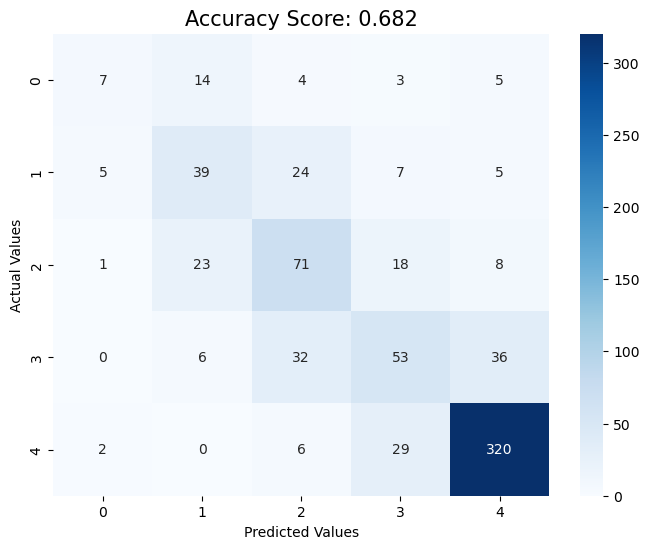

In [390]:
# Create an instance of the Random Forest Classifier
classifier = KNeighborsClassifier()

# Initialize and train the model
classifier.fit(X_train, y_train)

# Calculate the accuracy score
model_score = classifier.score(X_test, y_test)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate and plot the confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

We can see from the above figure that the accuracy of our model has decreased when using only our top three predictors compared to the original 12. We can tune our hyperparameters once again to see if we can optimise our model and get a greater accuracy in our results.

Fitting 3 folds for each of 100 candidates, totalling 300 fits


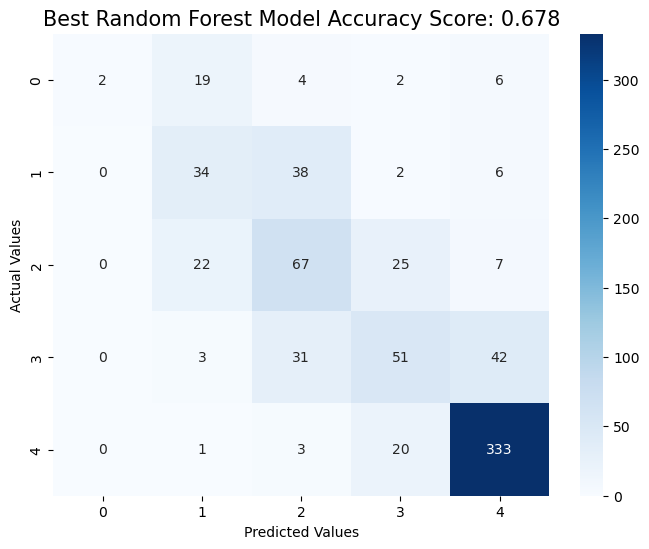

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 35}


In [385]:
# Define the corrected parameter grid for RandomForest
param_grid = {
    'n_estimators': np.arange(50, 201, 10),  # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Corrected the value here
    'max_depth': [None] + list(np.arange(10, 51, 5)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_classifier,
                                       param_distributions=param_grid,
                                       n_iter=100,  # Number of parameter settings to sample
                                       cv=3,  # Number of folds in cross-validation
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)  # Use all available cores

# Fit the model on the training data
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_rf_model.predict(X_test)
model_score_best = accuracy_score(y_test, y_pred_best)

# Calculate and plot the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Best Random Forest Model Accuracy Score: {0:.3f}'.format(model_score_best), size=15)
plt.show()

# Print the best hyperparameters found
print("Best Hyperparameters:", rf_random_search.best_params_)

Interestingly when optimising our model, we also lose a small amount of it's accuracy (~ 0.4%).

## Conclusion ##

A Random Forest predicts a students' grade with a accuracy of 70.2% without parameter tuning and a similar model is 68.2% accurate when using only the top three features:
- Absences,
- StudyTimeWeekly,
- ParentalSupport  

If we want our model to be slightly more accurate at the cost of more resources we can include all of the features.

There's a really interesting (and perhaps obvious) takeaway from this. If you want to achieve good grades:

- Go to class,
- Study your class material 
- and parental support/ involvement is also helpful but unfortunately thats out of your controll. 